# Hotel Booking
## Business Problem
In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each
hotel is now dealing with several issues as a result, including fewer revenues and less than-ideal hotel room use. 
Consequently, lowering cancellation rates is both hotels' primary goal to increase their efficiency in generating revenue, and for us to offer thorough business advice to address this problem. The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this report.

## Assumptions
1. No unusual occurrences between 2015 and 2017 will have a substantial impact on
the data used.
2. The information is still current and can be used to analyze a hotel's possible plans efficiently.
3. There are no unanticipated negatives to the hotel employing any advised technique.
4. The hotels are not currently using any of the suggested solutions.
5. The biggest factor affecting the effectiveness of earning income is booking
cancellations.
6. Cancellations result in vacant rooms for the booked length of time.
7. Clients make hotel reservations the same year they make cancellations.

## Research Question
1. What are the variables that affect hotel reservation cancellations?
2. How can we make hotel reservation cancellations better?
3. How will hotels be assisted in making pricing and promotional decisions?

## Hypothesis
1. More cancellations occur when prices are higher.
2. When there is a long waiting list, customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations.

# Imports

## libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## data

In [2]:
df = pd.read_csv('./hotel_booking.csv')

# Cleaning

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


**Removing columns that are not very useful: `name`, `email`, `phone-number`, `credit_card`**

In [4]:
df.drop(['name','email', 'phone-number','credit_card'], axis=1,inplace=True)

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.shape

(119390, 32)

In [7]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

`company` column is mainly empty hence needs to be removed

`agent` also has 13% null values hence we drop it as well

`country` data can be imputed with mode or can be dropped, as we have enough rows hence we drop the null rows of countries.

In [8]:
16340/df.shape[0]

0.13686238378423654

In [9]:
df.drop(['company', 'agent'], axis=1,inplace=True)

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

`reservation_status_date` is of object data type hence its converted to datetime datatype below

In [12]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [13]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745


In [14]:
for col in df.select_dtypes(include='object'):
    print(col)
    print(df[col].unique() ,end='\n\n')

hotel
['Resort Hotel' 'City Hotel']

arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal
['BB' 'FB' 'HB' 'SC' 'Undefined']

country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ

In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [16]:
df['adr'].describe()

count    118898.000000
mean        102.003243
std          50.485862
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Average daily rate (ADR), one of the three key hotel performance indicators (along with occupancy and RevPAR), is the measure of the average paid for rooms sold in a given time period. The metric covers only revenue-generating guestrooms.

`adr` column has 1 outlire with value 5000
its mean is 102 while median is 95 

<AxesSubplot:>

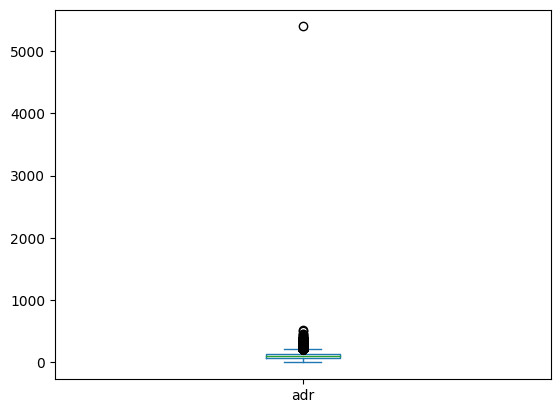

In [17]:
df['adr'].plot(kind='box')

In [18]:
df.drop(index = df[df['adr']>1000].index, inplace=True)

<AxesSubplot:>

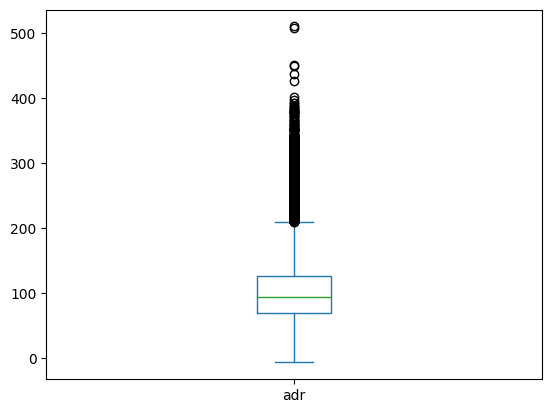

In [19]:
df['adr'].plot(kind='box')

There are some high values for `children` and `babies` let us see how many adults accompany them

In [20]:
df.nlargest(10, 'adults')[['adults', 'children', 'babies', 'is_canceled']]


,adults,children,babies,is_canceled
2173,55,0.0,0,1
1643,50,0.0,0,1
1539,40,0.0,0,1
1917,27,0.0,0,1
1962,27,0.0,0,1
1587,26,0.0,0,1
1752,26,0.0,0,1
1884,26,0.0,0,1
2003,26,0.0,0,1
2164,26,0.0,0,1


In [21]:
df.nlargest(10, 'children')[['adults', 'children', 'babies', 'is_canceled']]


,adults,children,babies,is_canceled
328,2,10.0,0,1
6748,2,3.0,0,1
7666,1,3.0,0,1
16360,2,3.0,0,0
18745,2,3.0,0,0
18746,2,3.0,0,0
19718,2,3.0,0,0
21005,2,3.0,0,0
22636,2,3.0,0,0
23407,2,3.0,0,0


One record with only 2 adults with 10 children is anomolous hence dropped below

In [22]:
print(df[df['children'] == 10].index)
df.drop(df[df['children'] == 10].index, inplace=True)

Int64Index([328], dtype='int64')


# EDA

In [23]:
percent_cancellation = df.is_canceled.value_counts(normalize=True)
percent_cancellation*100


0    62.865866
1    37.134134
Name: is_canceled, dtype: float64

**37% cancelled reservations is considerably large number as compared to not cancelled reservations**

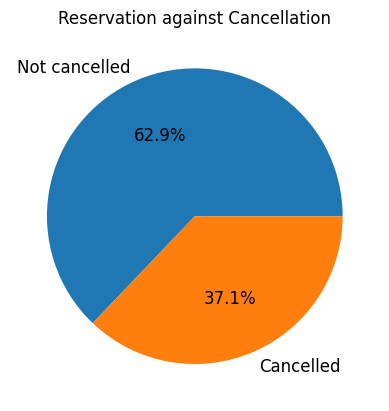

In [24]:
plt.title("Reservation against Cancellation")
plt.pie(percent_cancellation, 
        labels=['Not cancelled', 'Cancelled'],  
        autopct='%.1f%%',
        textprops={'size': 'large', 'color': 'black'})
plt.show()

**Cancellation rate of city hotels is more than resort hotels**

<AxesSubplot:xlabel='hotel', ylabel='count'>

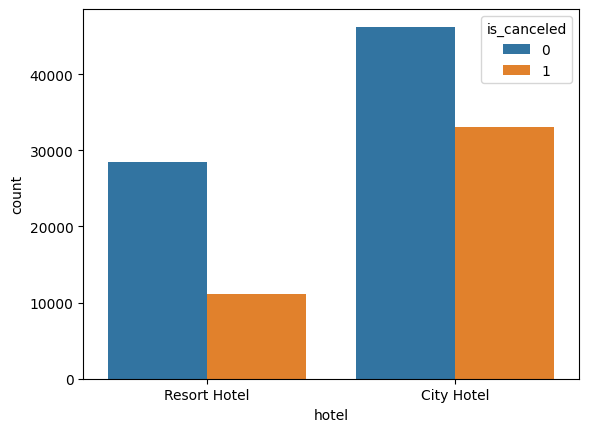

In [25]:
sns.countplot(x='hotel', data=df, hue='is_canceled')


**count of city hotels is also more than resort hotels, hence the cancellation rate of city hotels being more is obvious**

In [26]:
df.groupby(['is_canceled', 'hotel']).size().reset_index(name='count')

,is_canceled,hotel,count
0,0,City Hotel,46226
1,0,Resort Hotel,28519
2,1,City Hotel,33075
3,1,Resort Hotel,11076


In [27]:
print("Cancelled City hotels" , round(100*33075/(46226+33075),2),'%')
print("Cancelled Resort hotels ",round(100*11076/(28519+11076),2),'%')

Cancelled City hotels 41.71 %
Cancelled Resort hotels  27.97 %


About 42% of city hotels faced cancelled while
cancellation in resort hotels is 28%

<AxesSubplot:xlabel='customer_type', ylabel='count'>

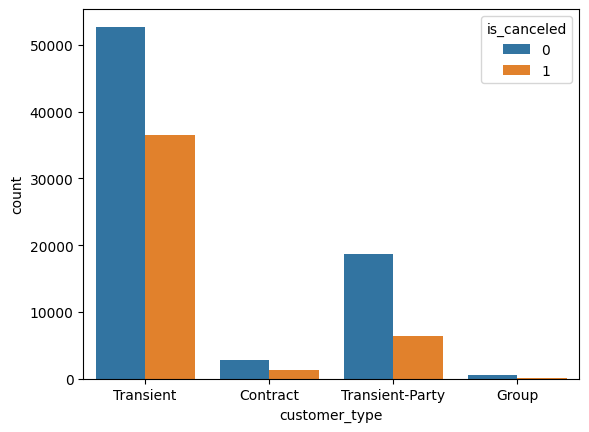

In [28]:
sns.countplot(x='customer_type', data=df, hue='is_canceled')


In [29]:
df.groupby("customer_type")["is_canceled"].value_counts(
    normalize=True).mul(100).reset_index(name='% cancelled/not')


,customer_type,is_canceled,% cancelled/not
0,Contract,0,69.055215
1,Contract,1,30.944785
2,Group,0,89.824561
3,Group,1,10.175439
4,Transient,0,59.114306
5,Transient,1,40.885694
6,Transient-Party,0,74.587288
7,Transient-Party,1,25.412712


**About 41% cancelation is observed in Transit customer type which is highest followed by contract, transit-party, group in decreasing order**

In [30]:
resort_hotel = df[df['hotel']=='Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']

In [31]:
resort_perday = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_perday = city_hotel.groupby('reservation_status_date')[['adr']].mean()

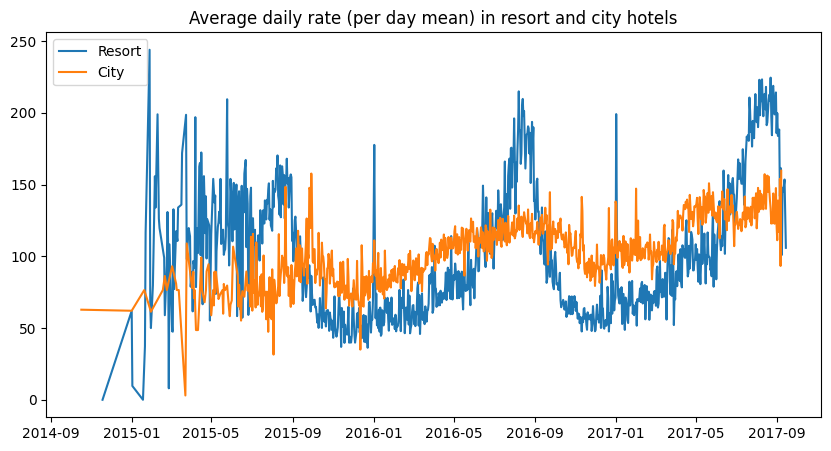

In [32]:
plt.figure(figsize=(10,5))
plt.title("Average daily rate (per day mean) in resort and city hotels")
plt.plot(resort_perday.index, resort_perday['adr'], label='Resort')
plt.plot(city_perday.index, city_perday['adr'], label='City')
plt.legend(loc='upper left')
plt.show()


- Price of city hotels is less than resort hotels most of the time
- Spikes in prices are on weekends or holidays 

<AxesSubplot:xlabel='months', ylabel='count'>

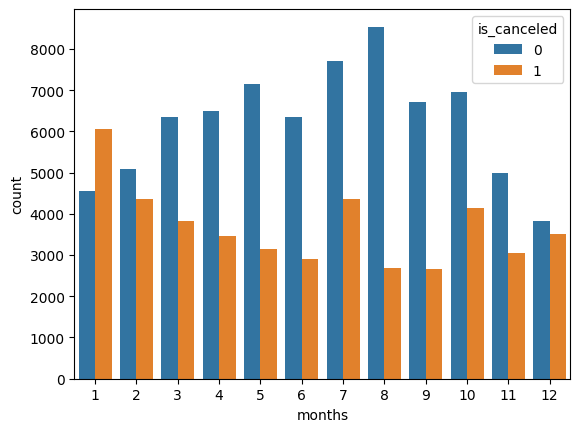

In [33]:
df['months'] = df['reservation_status_date'].dt.month

sns.countplot(x='months',hue = 'is_canceled',data=df)


- January has highest cancelation, infact cancelations are more than not canceled reservations
- August and September are months of holidays which have least and August have highest non cancelled reservations

<AxesSubplot:xlabel='months', ylabel='adr'>

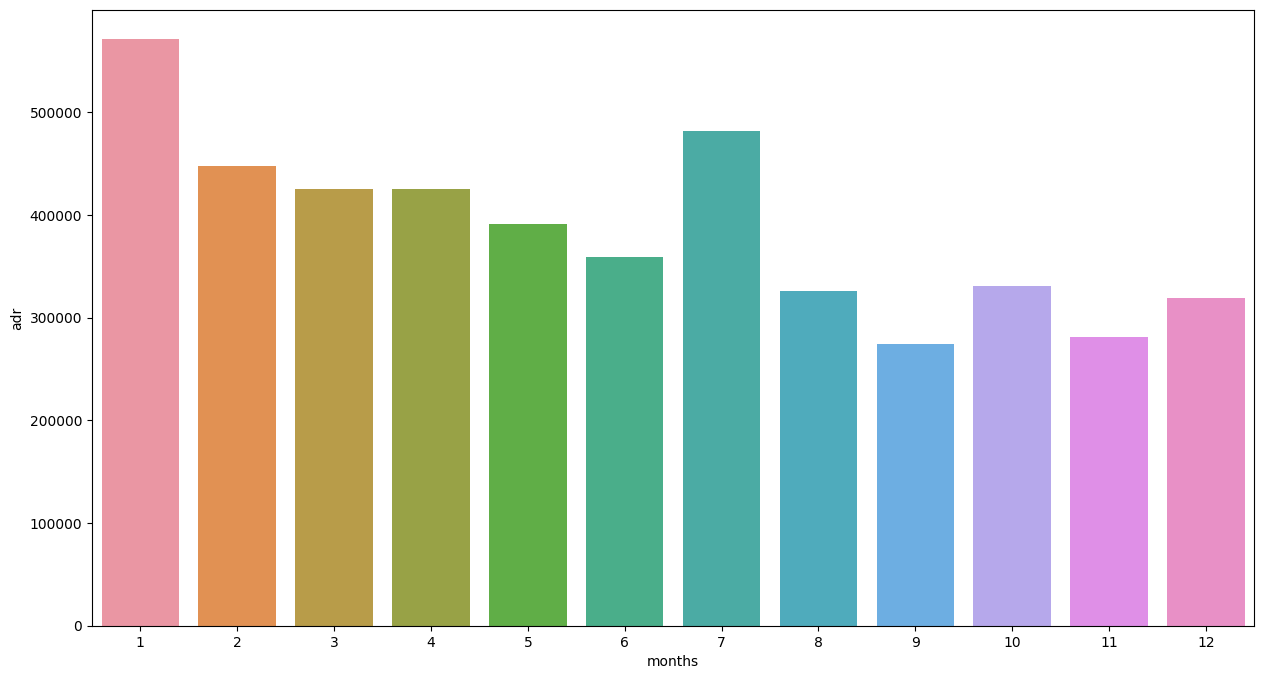

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(x='months', y='adr',data=df[df['is_canceled']==1].groupby('months')[['adr']].sum().reset_index())

- August and September are months of least ADR which have least cancellations
- January has highest ADR and highest cancellations

This implies that high ADR i.e., price is one of the main reasons for cancellation

In [35]:
top_10_countries = df[df['is_canceled'] == 1]['country'].value_counts()[:10].reset_index(name='count')
top_10_countries

,index,count
0,PRT,27513
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
5,DEU,1218
6,IRL,832
7,BRA,830
8,USA,501
9,BEL,474


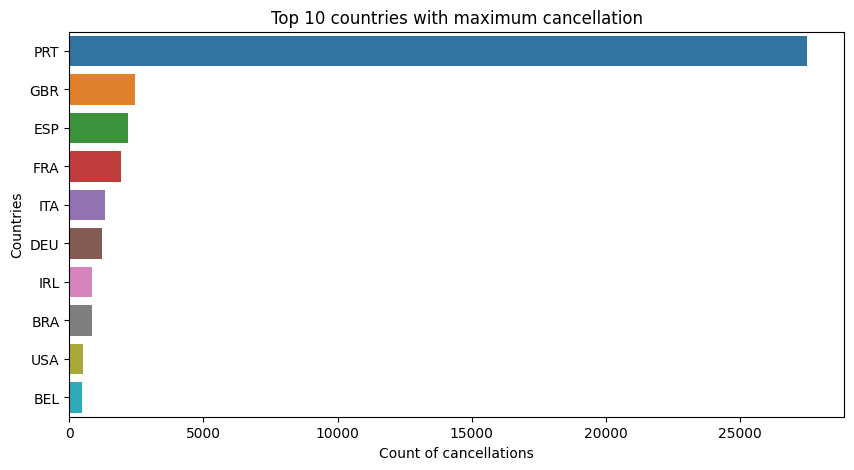

In [38]:
plt.figure(figsize=(10,5))
ax = sns.barplot('count','index',data=top_10_countries)
ax.set(ylabel='Countries', xlabel='Count of cancellations',
    title='Top 10 countries with maximum cancellation')
plt.show()

PRT i.e., Portugal Country has highest cancellations, these are much higher that other 9 countries